In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
train.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
train['salary'].fillna(value=0 , inplace = True )

In [6]:
train.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
train_copy=train.copy()

In [8]:
train.drop(['sl_no','ssc_b','hsc_b','salary'], axis = 1 , inplace = True)

In [9]:
train

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,0,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,0,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,1,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [10]:
train.dtypes

gender              int64
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

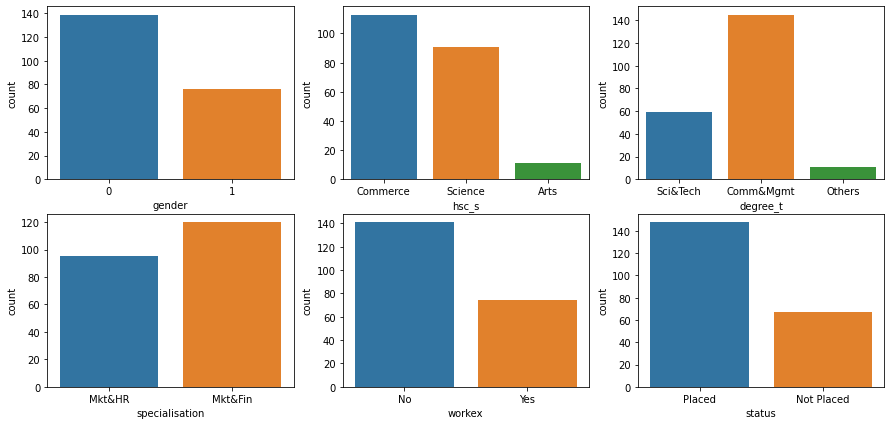

In [11]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = train)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = train)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = train)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = train)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = train)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = train)

In [12]:
object_cols= ['workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    train[col]= label_encoder.fit_transform(train[col])
    
train

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1
211,0,58.00,60.00,Science,72.00,Sci&Tech,0,74.0,0,53.62,1
212,0,67.00,67.00,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1
213,1,74.00,66.00,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,1


In [24]:
dummy_hsc_s = pd.get_dummies(train['hsc_s'])
dummy_degree_t = pd.get_dummies(train['degree_t'])
train1 = pd.concat([train, dummy_hsc_s , dummy_degree_t],axis = 1)
train1.drop(['hsc_s','degree_t'],axis = 1 , inplace = True)
train1.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [25]:
train1.shape

(215, 15)

In [26]:
X = train1.drop(['status'],axis=1)
y = train1.status

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

In [28]:
#Logistic Regression - 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test , y_test))

0.9069767441860465


C:\Users\91863\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7441860465116279


In [30]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.8604651162790697


In [23]:
pickle.dump(logreg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))